## Importing the necessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report


In [2]:
df=pd.read_csv('D:\smoking dataset\smoking.csv\smoking.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bhoom\AppData\Local\Temp\ipykernel_10276\1650987749.py:1: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('D:\smoking dataset\smoking.csv\smoking.csv')


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
df.shape
#rows,columns


(55692, 27)

In [4]:
df.columns
#checking the coloumns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [5]:
column_series = df['oral']
print(column_series)
#checking the values of oral

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
55687    Y
55688    Y
55689    Y
55690    Y
55691    Y
Name: oral, Length: 55692, dtype: object


## Trying label encoding to convert textual values to numerical values



In [6]:
#step1:identifying which all need to be encoded Here:oral,tartar,gender

columns_to_encode = ['gender', 'tartar','oral']

In [7]:
#Using LabelEncoder from sklearn.preprocessing to encode these columns
#intiating label encoder
label_encoder = LabelEncoder()
# Loop through each column and apply LabelEncoder
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [8]:
#to find na values
df.isnull().sum()


ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [9]:
# this extracts the values from the 'age' column of a DataFrame and converts them into a list, then prints that list
marks_list=df['age'].tolist()
print(marks_list)
#sorting age;age can be important where age demagrophic plays a important role
df=df.sort_values('age')
df

[40, 40, 55, 40, 40, 30, 40, 45, 50, 45, 30, 30, 35, 40, 45, 40, 60, 35, 60, 45, 30, 40, 55, 35, 45, 35, 25, 60, 45, 45, 65, 55, 20, 40, 50, 40, 25, 55, 35, 20, 40, 50, 60, 40, 80, 20, 25, 30, 50, 60, 50, 55, 50, 30, 40, 60, 45, 30, 40, 30, 35, 50, 35, 60, 40, 45, 50, 35, 40, 55, 50, 45, 50, 30, 65, 45, 20, 45, 60, 40, 45, 55, 40, 40, 35, 50, 45, 25, 25, 35, 55, 25, 40, 60, 50, 25, 40, 30, 35, 40, 60, 35, 50, 35, 55, 25, 25, 60, 50, 45, 50, 75, 60, 20, 45, 60, 45, 25, 25, 30, 45, 40, 40, 45, 40, 50, 65, 50, 30, 60, 45, 60, 45, 40, 30, 40, 40, 60, 70, 75, 45, 60, 25, 25, 40, 45, 40, 45, 60, 40, 40, 35, 45, 60, 30, 40, 50, 50, 60, 25, 30, 60, 55, 40, 45, 20, 55, 50, 40, 40, 50, 25, 25, 40, 35, 35, 35, 25, 40, 30, 25, 45, 40, 50, 35, 60, 45, 40, 40, 40, 40, 55, 45, 60, 50, 40, 35, 40, 45, 40, 30, 30, 30, 35, 45, 60, 55, 40, 40, 35, 30, 60, 25, 40, 35, 35, 40, 60, 25, 40, 55, 35, 45, 55, 40, 60, 45, 40, 60, 40, 75, 45, 50, 40, 40, 40, 55, 20, 35, 80, 40, 50, 40, 40, 50, 60, 35, 55, 60, 60,

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
43025,53788,1,20,175,75,83.0,0.9,0.8,1.0,1.0,...,16.1,1.0,0.9,42.0,48.0,55.0,0,1,0,1
43036,53800,1,20,185,85,79.0,1.2,1.2,1.0,1.0,...,16.7,1.0,1.1,19.0,10.0,23.0,0,1,0,1
13688,17062,1,20,170,70,80.0,1.0,1.0,1.0,1.0,...,15.8,1.0,1.2,21.0,14.0,20.0,0,1,1,1
40097,50091,1,20,175,75,80.0,1.5,1.5,1.0,1.0,...,15.9,1.0,0.8,37.0,37.0,47.0,0,0,0,0
40092,50086,1,20,165,50,68.0,1.2,1.2,1.0,1.0,...,15.7,1.0,0.9,27.0,22.0,27.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3267,0,85,145,50,78.0,0.6,0.7,1.0,2.0,...,14.7,1.0,0.6,22.0,8.0,12.0,0,1,1,0
5246,6612,1,85,165,70,90.0,0.6,0.8,1.0,1.0,...,12.7,1.0,0.8,44.0,26.0,43.0,0,0,0,0
16394,20435,1,85,155,55,86.0,0.9,0.4,1.0,1.0,...,14.1,1.0,0.8,23.0,11.0,20.0,0,0,0,1
32038,40020,1,85,165,60,83.0,0.4,1.0,2.0,2.0,...,12.5,1.0,1.3,22.0,14.0,39.0,0,0,0,0


In [10]:
#df

## Plotting heatmap

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

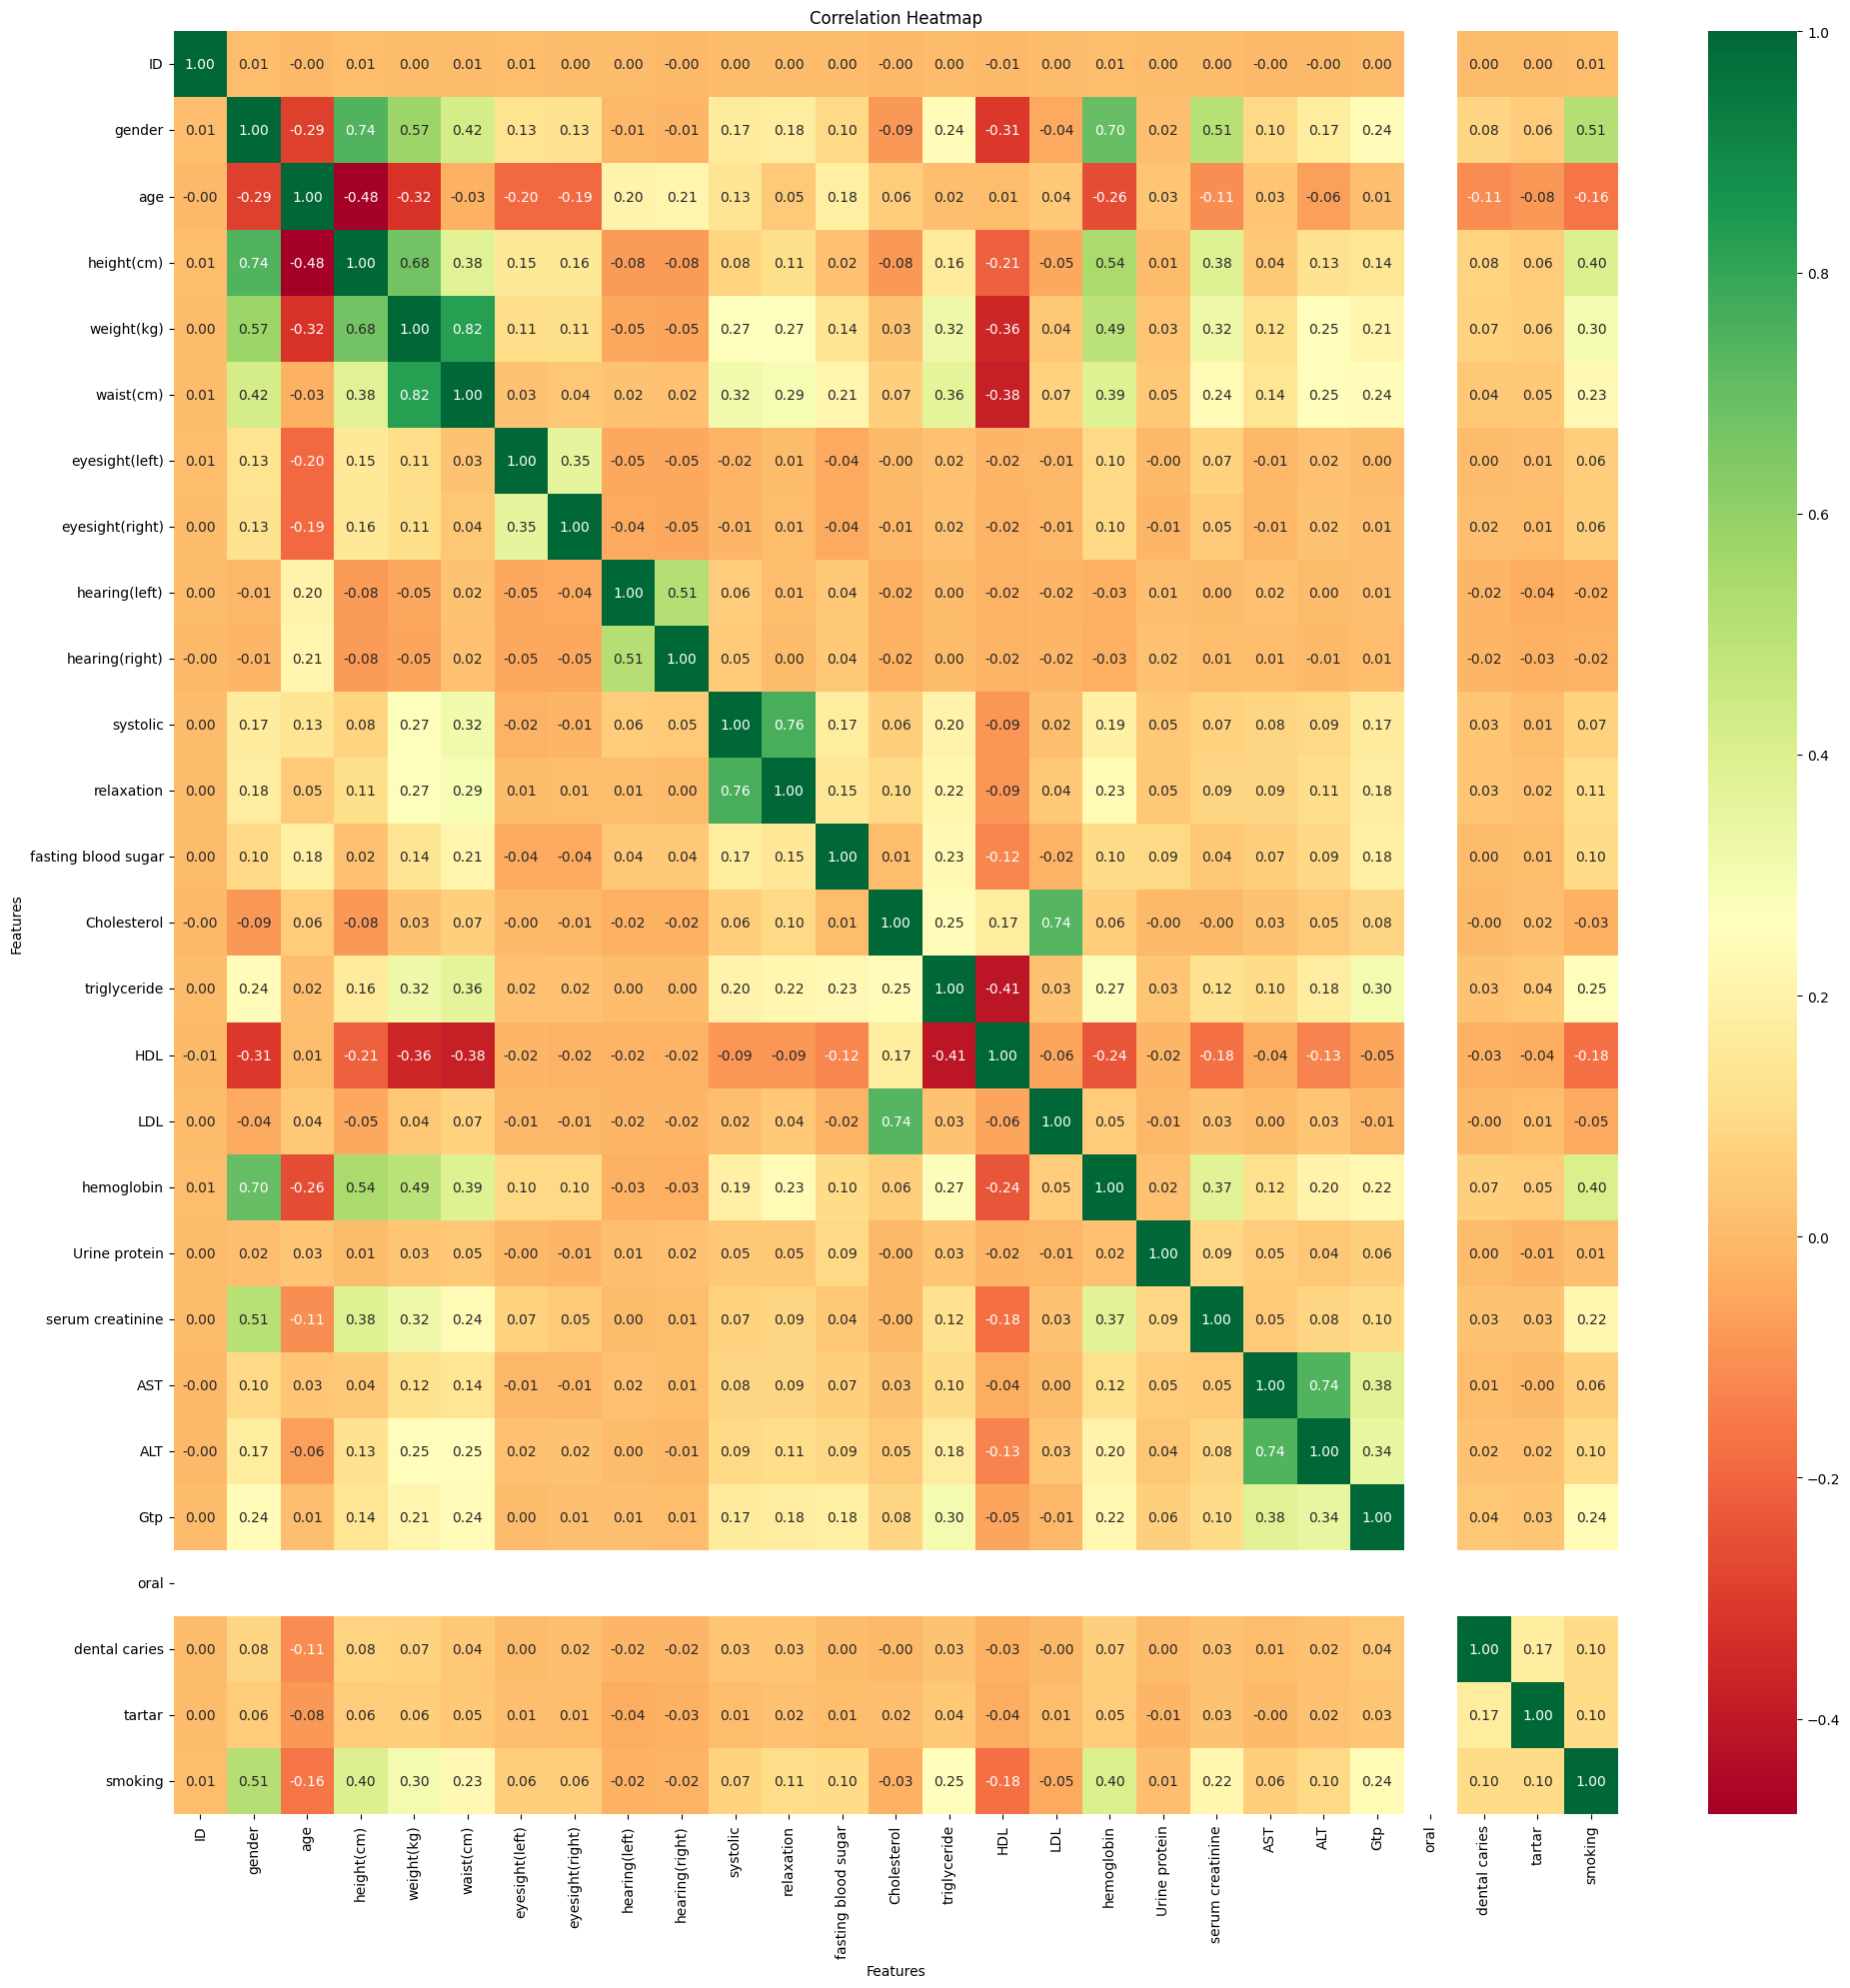

In [12]:
plt.figure(figsize=(20, 20))  # Set the figure size (adjust as needed)
sns.heatmap(corr_matrix, cmap="RdYlGn", annot=True, fmt=".2f")  # Adjust cmap and other parameters as required
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xlabel('Features')  # Set the label for the x-axis
plt.ylabel('Features')  # Set the label for the y-axis
plt.tight_layout()  # Adjust layout for better visualization
plt.show() 

In [13]:

#getting the absolute value (mod)
abs_corr_matrix = corr_matrix.abs()


In [14]:
'''Insights recieved from the heatmap:
Significant co-relations:
   -Height and Weight: Height (height(cm)) is strongly correlated with weight (weight(kg)) (0.68).
   -Height and Weight: Height (height(cm)) is strongly correlated with weight (weight(kg)) (0.68).
   -Systolic and Diastolic Blood Pressure: Systolic (systolic) and diastolic (relaxation) blood pressure are highly correlated (0.76).
   -Cholesterol and Triglycerides: Cholesterol (Cholesterol) is highly correlated with triglycerides (triglyceride) (0.74).
Negative co-relations:
   -Age and Height: Age (age) has a negative correlation with height (height(cm)) (-0.48), indicating that height may decrease with age.
Moderate Correlations:
   -Waist Circumference and Serum Creatinine: Waist circumference (waist(cm)) and serum creatinine (serum creatinine) have a moderate correlation (0.32).'''

'Insights recieved from the heatmap:\nSignificant co-relations:\n   -Height and Weight: Height (height(cm)) is strongly correlated with weight (weight(kg)) (0.68).\n   -Height and Weight: Height (height(cm)) is strongly correlated with weight (weight(kg)) (0.68).\n   -Systolic and Diastolic Blood Pressure: Systolic (systolic) and diastolic (relaxation) blood pressure are highly correlated (0.76).\n   -Cholesterol and Triglycerides: Cholesterol (Cholesterol) is highly correlated with triglycerides (triglyceride) (0.74).\nNegative co-relations:\n   -Age and Height: Age (age) has a negative correlation with height (height(cm)) (-0.48), indicating that height may decrease with age.\nModerate Correlations:\n   -Waist Circumference and Serum Creatinine: Waist circumference (waist(cm)) and serum creatinine (serum creatinine) have a moderate correlation (0.32).'

## Boolean Masks for Correlation Values

The following code creates boolean masks based on correlation values from an absolute correlation matrix. Each mask indicates whether the correlation values meet specified thresholds.

### Create a Mask for Correlations Greater Than or Equal to 0.2

This creates a boolean mask where each element is `True` if the corresponding correlation value is greater than or equal to 0.2, and `False` otherwise.

In [15]:
#abs_corr_matrix >= 0.2: This creates a boolean mask where each element is True if the corresponding correlation value is greater than or equal to 0.2, and False otherwise.
#abs_corr_matrix >= 0.4: Similarly, this creates a boolean mask for correlation values greater than or equal to 0.4.
# Creating  a mask for correlations greater than or equal to 0.2
mask_0_2 = abs_corr_matrix >= 0.2

# Creating a mask for correlations greater than or equal to 0.4
mask_0_4 = abs_corr_matrix >= 0.4


In [16]:
#For correlations >= 0.2:
df02= abs_corr_matrix.columns[(mask_0_2.any())]
df22 = df[df02]


In [17]:
filtered_columns_0_4 = abs_corr_matrix.columns[(mask_0_4.any())]
df44 = df[filtered_columns_0_4]


## Visualization with Pie chart





In [18]:
#df

In [19]:
#filtering females
females_data = df[df['gender'] == 0]
smoker_count = females_data[females_data['smoking'] == 1].shape[0]
non_smoker_count=females_data[females_data['smoking']==0].shape[0]


In [20]:
# Counting the number of smokers and non-smokers
smokers_count=females_data['smoking'].value_counts()
smoker_count = females_data[females_data['smoking'] == 1].shape[0]
non_smoker_count=females_data[females_data['smoking']==0].shape[0]

(1)Pie chart for smokers and non-smokers(male,female) 

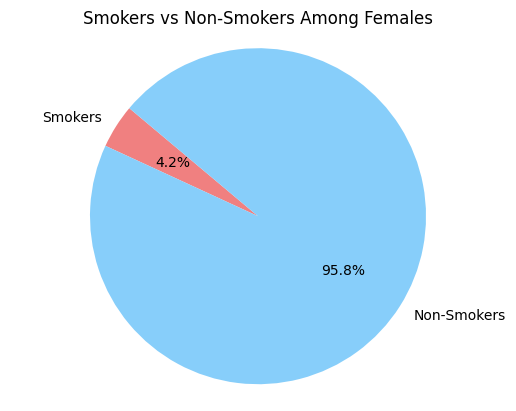

In [21]:
labels = ['Smokers', 'Non-Smokers']
sizes = [smoker_count, non_smoker_count]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Smokers vs Non-Smokers Among Females')
plt.show()

In [22]:
#filtering the male data
male_data=df[df['gender']==1]
smoker_count = male_data[male_data['smoking'] == 1].shape[0]
non_smoker_count=male_data[male_data['smoking']==0].shape[0]

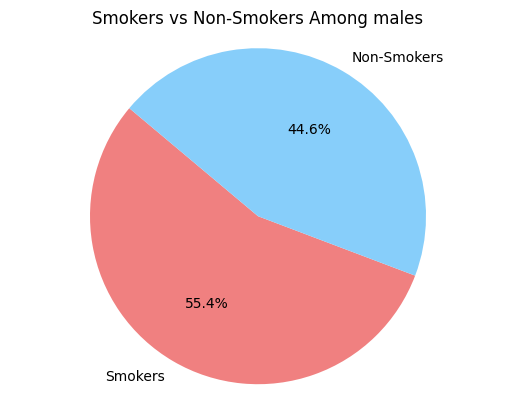

In [23]:

labels = ['Smokers', 'Non-Smokers']
sizes = [smoker_count, non_smoker_count]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Smokers vs Non-Smokers Among males')
plt.show()

(2)Pie chart for people with Cholestrol

In [24]:
for v in df['Cholesterol']:
    print(v)

182.0
164.0
165.0
235.0
152.0
167.0
197.0
180.0
191.0
146.0
176.0
197.0
149.0
182.0
166.0
152.0
181.0
144.0
220.0
177.0
125.0
217.0
166.0
144.0
198.0
180.0
116.0
172.0
129.0
156.0
131.0
162.0
157.0
140.0
161.0
151.0
196.0
164.0
155.0
148.0
169.0
149.0
176.0
148.0
198.0
186.0
148.0
162.0
178.0
177.0
150.0
166.0
197.0
155.0
131.0
247.0
219.0
169.0
159.0
151.0
149.0
169.0
192.0
155.0
187.0
139.0
192.0
209.0
151.0
160.0
171.0
197.0
166.0
137.0
169.0
188.0
185.0
180.0
188.0
155.0
128.0
190.0
147.0
168.0
171.0
187.0
256.0
203.0
139.0
175.0
149.0
115.0
166.0
159.0
211.0
168.0
182.0
236.0
149.0
226.0
247.0
154.0
219.0
214.0
139.0
207.0
152.0
133.0
225.0
183.0
186.0
152.0
177.0
182.0
140.0
177.0
162.0
183.0
148.0
164.0
169.0
127.0
192.0
155.0
210.0
182.0
225.0
151.0
146.0
183.0
146.0
171.0
182.0
141.0
167.0
226.0
184.0
207.0
186.0
161.0
175.0
177.0
170.0
210.0
140.0
150.0
235.0
157.0
165.0
171.0
230.0
166.0
176.0
137.0
194.0
139.0
160.0
189.0
177.0
149.0
138.0
212.0
222.0
168.0
194.0
239.0
84.0

In [25]:
print(df['Cholesterol'])


43025    182.0
43036    164.0
13688    165.0
40097    235.0
40092    152.0
         ...  
2599     236.0
5246     178.0
16394    182.0
32038    159.0
11310    201.0
Name: Cholesterol, Length: 55692, dtype: float64


In [26]:
#checking for cholestrol "AGAIN"
df.columns = df.columns.str.strip()
print(df.columns) 

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')


In [27]:
def classify_cholesterol(level):
    if level < 200:
        return 'Low'
    elif 200 <= level < 240:
        return 'Normal'
    else:
        return 'High'

In [28]:
# Applying the classification function to the 'Cholesterol' column
df['cholesterol_category'] = df['Cholesterol'].apply(classify_cholesterol)

In [29]:
# Separating data for males and females
male_data = df[df['gender'] == 1]
female_data = df[df['gender'] == 0]

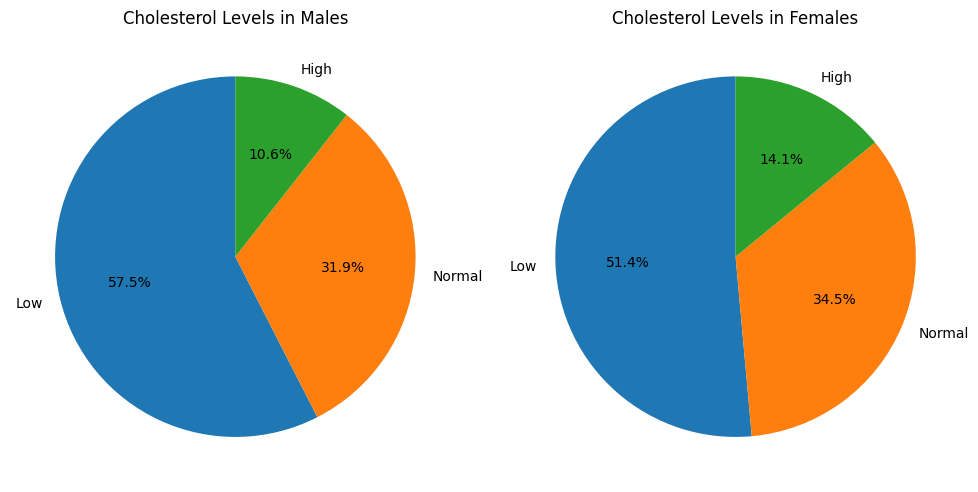

In [30]:
male_counts = male_data['cholesterol_category'].value_counts()
female_counts = female_data['cholesterol_category'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
male_counts.plot(kind='pie', autopct='%1.1f%%', title='Cholesterol Levels in Males', startangle=90)
plt.ylabel('')  
plt.subplot(1, 2, 2)
female_counts.plot(kind='pie', autopct='%1.1f%%', title='Cholesterol Levels in Females', startangle=90)
plt.ylabel('')  

plt.tight_layout()
plt.show()

(2)Pie chart for people with oral issues 


In [31]:
oral_counts = df['oral'].value_counts()

In [32]:
labels = ['No Oral Issues', 'Oral Issues']

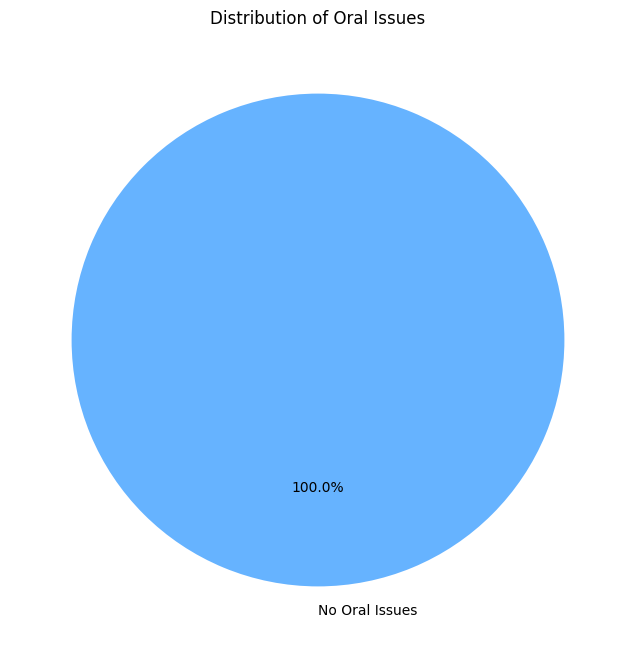

In [33]:
plt.figure(figsize=(8, 8))
oral_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
# Set the title
plt.title('Distribution of Oral Issues')

plt.ylabel('')

plt.show()

## Distribution Plot of Age

The following code snippet demonstrates how to create a distribution plot for the 'age' column of a DataFrame using Matplotlib and Seaborn. The plot includes a rug plot and can be adjusted for the number of bins.


C:\Users\bhoom\AppData\Local\Temp\ipykernel_10276\3583128818.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], rug=True, bins=30)  # Increase bins as neededplt.show()


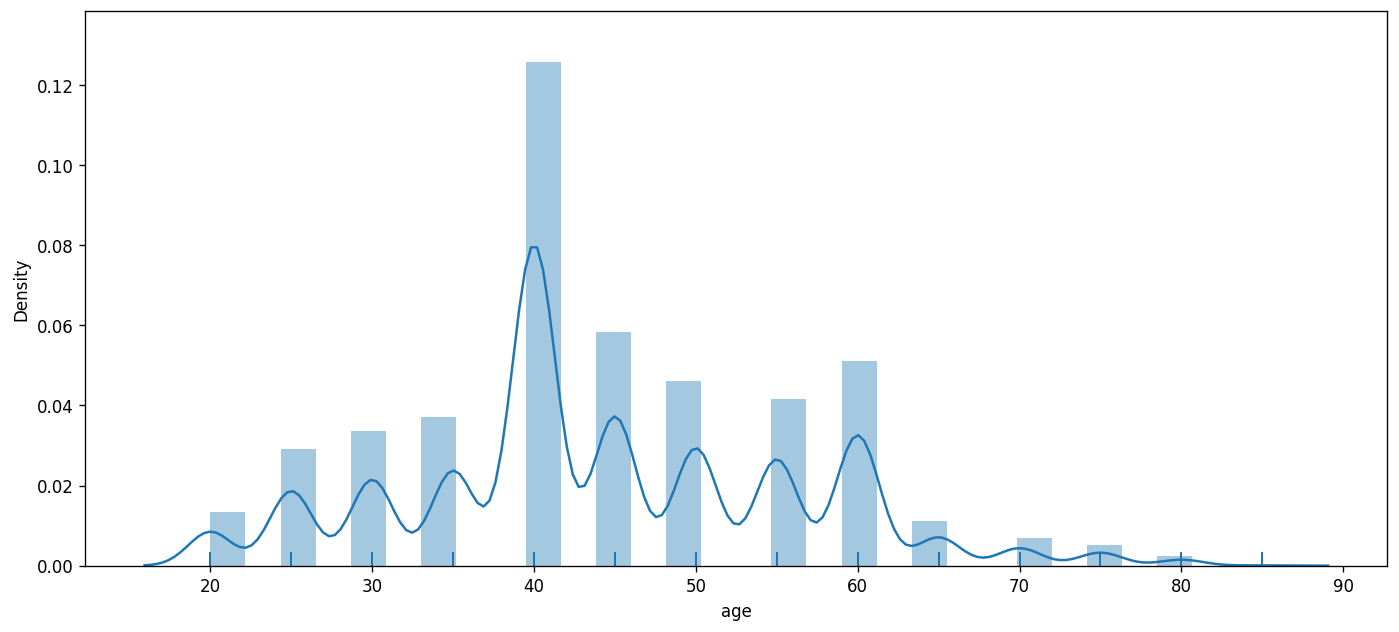

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6), dpi=120)  # Adjust dpi as needed
sns.distplot(df['age'], rug=True, bins=30)  # Increase bins as neededplt.show()

plt.show()


In [35]:
#df

Making a copy of the dataset

In [36]:
#Making a copy of the dataset
copied_df = df.copy()

#renaming the dataset
df1 = copied_df

#checking
print(df1.head())

print (df1.shape)

          ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
43025  53788       1   20         175          75       83.0             0.9   
43036  53800       1   20         185          85       79.0             1.2   
13688  17062       1   20         170          70       80.0             1.0   
40097  50091       1   20         175          75       80.0             1.5   
40092  50086       1   20         165          50       68.0             1.2   

       eyesight(right)  hearing(left)  hearing(right)  ...  Urine protein  \
43025              0.8            1.0             1.0  ...            1.0   
43036              1.2            1.0             1.0  ...            1.0   
13688              1.0            1.0             1.0  ...            1.0   
40097              1.5            1.0             1.0  ...            1.0   
40092              1.2            1.0             1.0  ...            1.0   

       serum creatinine   AST   ALT   Gtp  oral  dental 

In [37]:
'''Remember that df is the original dataset and 
df1 is where you are eliminating coloumns that are irrelevant'''

'Remember that df is the original dataset and \ndf1 is where you are eliminating coloumns that are irrelevant'

In [38]:
#succesfully copied the original datset df to df1

df1

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,cholesterol_category
43025,53788,1,20,175,75,83.0,0.9,0.8,1.0,1.0,...,1.0,0.9,42.0,48.0,55.0,0,1,0,1,Low
43036,53800,1,20,185,85,79.0,1.2,1.2,1.0,1.0,...,1.0,1.1,19.0,10.0,23.0,0,1,0,1,Low
13688,17062,1,20,170,70,80.0,1.0,1.0,1.0,1.0,...,1.0,1.2,21.0,14.0,20.0,0,1,1,1,Low
40097,50091,1,20,175,75,80.0,1.5,1.5,1.0,1.0,...,1.0,0.8,37.0,37.0,47.0,0,0,0,0,Normal
40092,50086,1,20,165,50,68.0,1.2,1.2,1.0,1.0,...,1.0,0.9,27.0,22.0,27.0,0,0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3267,0,85,145,50,78.0,0.6,0.7,1.0,2.0,...,1.0,0.6,22.0,8.0,12.0,0,1,1,0,Normal
5246,6612,1,85,165,70,90.0,0.6,0.8,1.0,1.0,...,1.0,0.8,44.0,26.0,43.0,0,0,0,0,Low
16394,20435,1,85,155,55,86.0,0.9,0.4,1.0,1.0,...,1.0,0.8,23.0,11.0,20.0,0,0,0,1,Low
32038,40020,1,85,165,60,83.0,0.4,1.0,2.0,2.0,...,1.0,1.3,22.0,14.0,39.0,0,0,0,0,Low


## Dropping irrelevant coloumns (wrt smoking)

In [39]:
print(df.shape)
df1.drop(['oral'], axis=1, inplace=True)
print(df1.shape)

(55692, 28)
(55692, 27)


In [40]:
smokers_data=df[df['smoking']==1]
non_smokers_data=df[df['smoking']==0]


In [41]:
#counting the occurences of each 
smokers_counts = smokers_data['dental caries'].value_counts()
non_smokers_counts = non_smokers_data['dental caries'].value_counts()

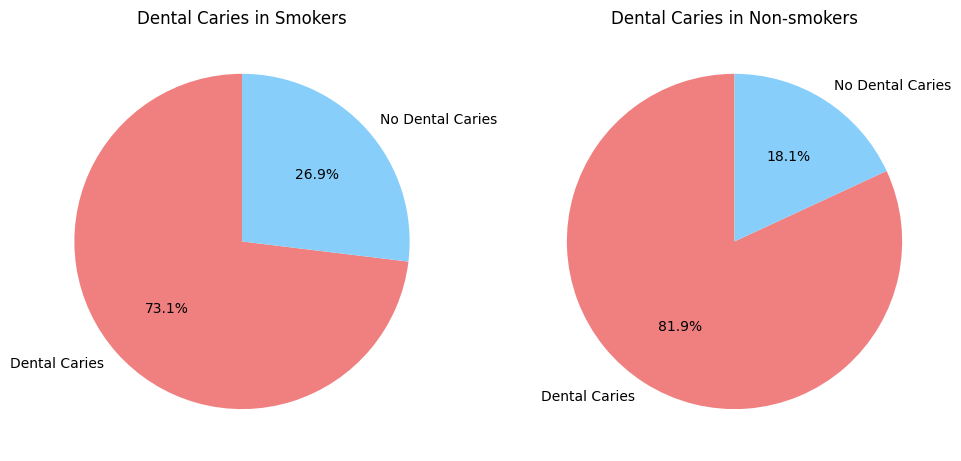

In [42]:
labels=['Dental Caries','No Dental Caries']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
smokers_counts.plot(kind='pie', autopct='%1.1f%%', title='Dental Caries in Smokers', startangle=90,labels=labels,colors=colors)

plt.ylabel('')  



# Plot pie chart for females
plt.subplot(1, 2, 2)
non_smokers_counts.plot(kind='pie', autopct='%1.1f%%', title='Dental Caries in Non-smokers', startangle=90,labels=labels,colors=colors)
plt.ylabel('')  
plt.tight_layout()
plt.show()

In [43]:
print(df1.shape)
df1.drop(['dental caries'], axis=1, inplace=True)
print(df1.shape)


(55692, 27)
(55692, 26)


In [44]:
smokers_data=df[df['smoking']==1]
non_smokers_data=df[df['smoking']==0]


In [45]:
#counting the occurences of each 
smokers_counts = smokers_data['eyesight(left)'].value_counts()
non_smokers_counts = non_smokers_data['eyesight(left)'].value_counts()

In [46]:
# Droppin the 'eyesight(left)' column from the DataFrame
print(df1.shape)
df1.drop(['eyesight(left)'], axis=1, inplace=True)
print(df1.shape)

(55692, 26)
(55692, 25)


In [47]:
# Dropping the 'eyesight(right)' column from the DataFrame
print (df1.shape)
df1.drop(['eyesight(right)'], axis=1,inplace=True)
print(df1.shape)

(55692, 25)
(55692, 24)


In [48]:
#dealing with hearing (left) and hearing (right)
smokers_data=df[df['smoking']==1]
non_smokers_data=df[df['smoking']==0]


In [49]:
#counting the occurences of each 
smokers_hearing_counts = smokers_data['hearing(left)'].value_counts()
non_smokers_hearing_counts= non_smokers_data['hearing(left)'].value_counts()

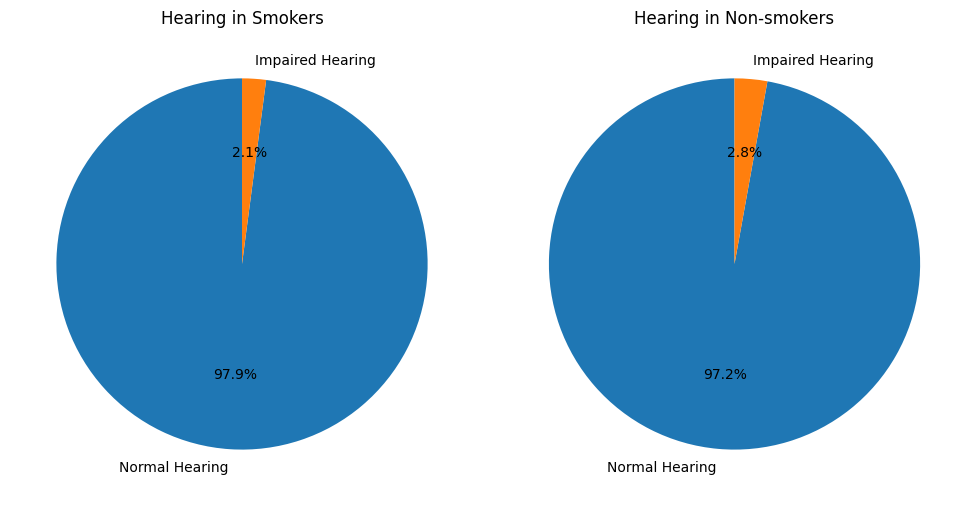

In [50]:

# Plotting pie charts for smokers and non-smokers
labels = ['Normal Hearing', 'Impaired Hearing']

plt.figure(figsize=(10, 5))

# Plotting pie chart for smokers
plt.subplot(1, 2, 1)
smokers_hearing_counts.plot(kind='pie', autopct='%1.1f%%', title='Hearing in Smokers', startangle=90, labels=labels)
plt.ylabel('')  

# Plotting pie chart for non-smokers
plt.subplot(1, 2, 2)
non_smokers_hearing_counts.plot(kind='pie', autopct='%1.1f%%', title='Hearing in Non-smokers', startangle=90, labels=labels)
plt.ylabel('')  
plt.tight_layout()
plt.show()

In [51]:
#irrelevant so dropping it and
print(df1.shape)
df1.drop(['hearing(left)'],axis=1,inplace=True)
print(df1.shape)

(55692, 24)
(55692, 23)


In [52]:
#hearing right
smokers_data=df[df['smoking']==1]
non_smokers_data=df[df['smoking']==0]

In [53]:
#counting the occurences of each 
smokers_hearing_r_counts = smokers_data['hearing(right)'].value_counts()
non_smokers_hearing_r_counts= non_smokers_data['hearing(right)'].value_counts()

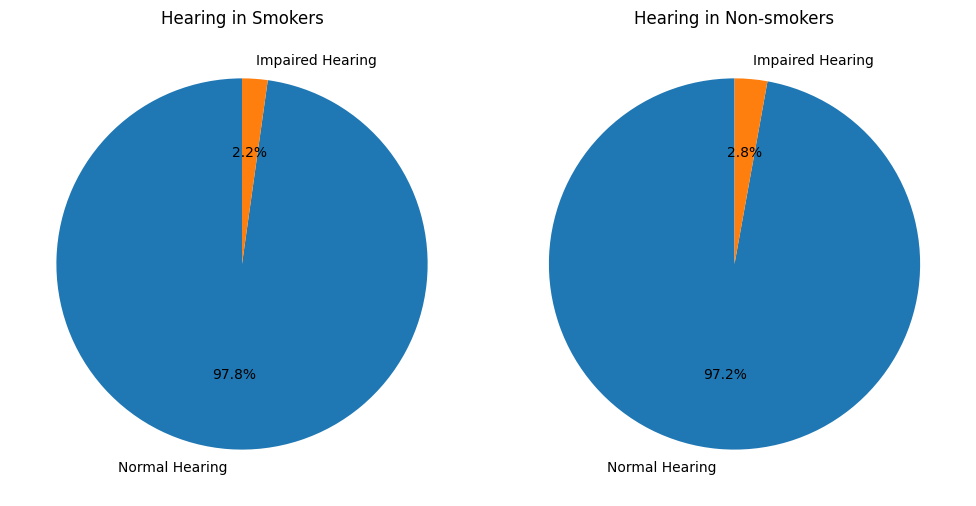

In [54]:
# Plotting pie charts for smokers and non-smokers
labels = ['Normal Hearing', 'Impaired Hearing']

plt.figure(figsize=(10, 5))

# Plotting pie chart for smokers
plt.subplot(1, 2, 1)
smokers_hearing_r_counts.plot(kind='pie', autopct='%1.1f%%', title='Hearing in Smokers', startangle=90, labels=labels)
plt.ylabel('')  

# Plotting pie chart for non-smokers
plt.subplot(1, 2, 2)
non_smokers_hearing_r_counts.plot(kind='pie', autopct='%1.1f%%', title='Hearing in Non-smokers', startangle=90, labels=labels)
plt.ylabel('')  
plt.tight_layout()
plt.show()

In [55]:
print(df1.shape)
df1.drop(['hearing(right)'],axis=1,inplace=True)
print(df1.shape)

(55692, 23)
(55692, 22)


In [56]:
'''Tartar, also known as dental calculus, is a hardened form
of plaque that can build up on teeth above and below the gum line. 
It's caused by a combination of bacteria, proteins, food particles, 
saliva, and minerals from gingival crevicular fluid that precipitate in plaque on teeth.'''

"Tartar, also known as dental calculus, is a hardened form\nof plaque that can build up on teeth above and below the gum line. \nIt's caused by a combination of bacteria, proteins, food particles, \nsaliva, and minerals from gingival crevicular fluid that precipitate in plaque on teeth."

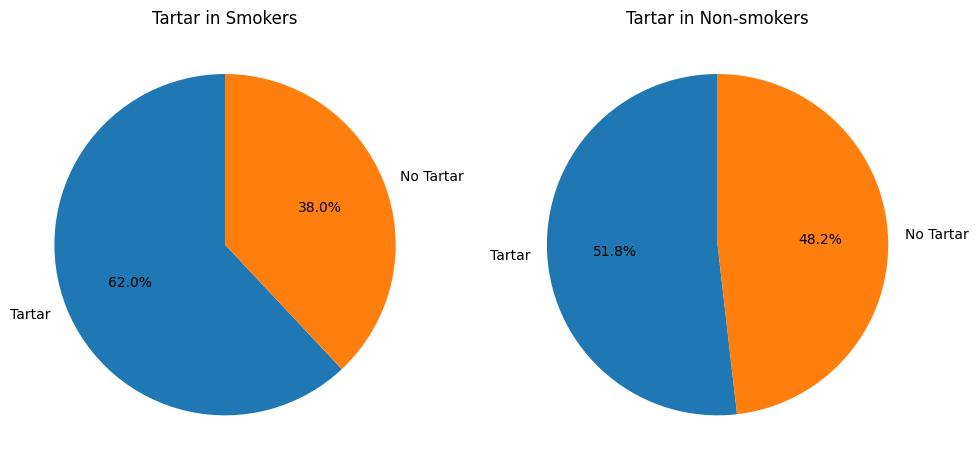

In [57]:
#pie chart for tartar in smokers and non smokers
smokers_data=df[df['smoking']==1]
non_smokers_data=df[df['smoking']==0]
#counting the occurences of each 
smokers_tartar_counts = smokers_data['tartar'].value_counts()
non_smokers_tartar_counts= non_smokers_data['tartar'].value_counts()
# Plotting pie charts for smokers and non-smokers
labels = ['Tartar', 'No Tartar']

plt.figure(figsize=(10, 5))

# Plotting pie chart for smokers
plt.subplot(1, 2, 1)
smokers_tartar_counts.plot(kind='pie', autopct='%1.1f%%', title='Tartar in Smokers', startangle=90, labels=labels)
plt.ylabel('')  

# Plotting pie chart for non-smokers
plt.subplot(1, 2, 2)
non_smokers_tartar_counts.plot(kind='pie', autopct='%1.1f%%', title='Tartar in Non-smokers', startangle=90, labels=labels)
plt.ylabel('')  
plt.tight_layout()
plt.show()

In [58]:
'''From this we can tell its pretty important'''

'From this we can tell its pretty important'

In [59]:
'''HDL stands for high-density lipoprotein, 
 and it's a type of lipoprotein that's often called "good" cholesterol.
 HDL is a complex particle made up of proteins and lipids that transports fats,
 like cholesterol, throughout the body to cells that need them.
 HDL absorbs cholesterol from the blood and carries it to the liver,
 where it's broken down and removed from the body'''

'HDL stands for high-density lipoprotein, \n and it\'s a type of lipoprotein that\'s often called "good" cholesterol.\n HDL is a complex particle made up of proteins and lipids that transports fats,\n like cholesterol, throughout the body to cells that need them.\n HDL absorbs cholesterol from the blood and carries it to the liver,\n where it\'s broken down and removed from the body'

In [60]:
'''Low-density lipoprotein (LDL) is a type of cholesterol
 that transports cholesterol particles throughout the body, 
 and is sometimes called "bad" cholesterol. High levels of LDL can lead to 
plaque buildup in your blood vessels, which can increase the risk of heart 
attack, stroke, and other health problems.'''

'Low-density lipoprotein (LDL) is a type of cholesterol\n that transports cholesterol particles throughout the body, \n and is sometimes called "bad" cholesterol. High levels of LDL can lead to \nplaque buildup in your blood vessels, which can increase the risk of heart \nattack, stroke, and other health problems.'

In [61]:
df1

,ID,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,smoking,cholesterol_category
43025,53788,1,20,175,75,83.0,128.0,80.0,101.0,182.0,...,100.0,16.1,1.0,0.9,42.0,48.0,55.0,0,1,Low
43036,53800,1,20,185,85,79.0,120.0,76.0,74.0,164.0,...,61.0,16.7,1.0,1.1,19.0,10.0,23.0,0,1,Low
13688,17062,1,20,170,70,80.0,115.0,75.0,87.0,165.0,...,91.0,15.8,1.0,1.2,21.0,14.0,20.0,1,1,Low
40097,50091,1,20,175,75,80.0,120.0,80.0,97.0,235.0,...,119.0,15.9,1.0,0.8,37.0,37.0,47.0,0,0,Normal
40092,50086,1,20,165,50,68.0,110.0,76.0,98.0,152.0,...,77.0,15.7,1.0,0.9,27.0,22.0,27.0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3267,0,85,145,50,78.0,134.0,85.0,100.0,236.0,...,146.0,14.7,1.0,0.6,22.0,8.0,12.0,1,0,Normal
5246,6612,1,85,165,70,90.0,110.0,60.0,112.0,178.0,...,93.0,12.7,1.0,0.8,44.0,26.0,43.0,0,0,Low
16394,20435,1,85,155,55,86.0,135.0,68.0,86.0,182.0,...,109.0,14.1,1.0,0.8,23.0,11.0,20.0,0,1,Low
32038,40020,1,85,165,60,83.0,135.0,71.0,97.0,159.0,...,93.0,12.5,1.0,1.3,22.0,14.0,39.0,0,0,Low


In [62]:
'''according to the heatmap:
Irrelevant or Low correlation coloumns are:
HDL,LDL has -0.18 and -0.05 values respectfully
smoking negatively affects cholesterol levels by 
decreasing HDL and increasing LDL, which significantly elevates 
the risk of cardiovascular diseases.
'''

'according to the heatmap:\nIrrelevant or Low correlation coloumns are:\nHDL,LDL has -0.18 and -0.05 values respectfully\nsmoking negatively affects cholesterol levels by \ndecreasing HDL and increasing LDL, which significantly elevates \nthe risk of cardiovascular diseases.\n'

In [63]:
print(df.shape)

(55692, 28)


In [64]:
#dropping HDl
print(df1.shape)
df1.drop(['HDL'],axis=1,inplace=True)
print(df1.shape)




(55692, 22)
(55692, 21)


In [65]:
df1

,ID,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,smoking,cholesterol_category
43025,53788,1,20,175,75,83.0,128.0,80.0,101.0,182.0,...,100.0,16.1,1.0,0.9,42.0,48.0,55.0,0,1,Low
43036,53800,1,20,185,85,79.0,120.0,76.0,74.0,164.0,...,61.0,16.7,1.0,1.1,19.0,10.0,23.0,0,1,Low
13688,17062,1,20,170,70,80.0,115.0,75.0,87.0,165.0,...,91.0,15.8,1.0,1.2,21.0,14.0,20.0,1,1,Low
40097,50091,1,20,175,75,80.0,120.0,80.0,97.0,235.0,...,119.0,15.9,1.0,0.8,37.0,37.0,47.0,0,0,Normal
40092,50086,1,20,165,50,68.0,110.0,76.0,98.0,152.0,...,77.0,15.7,1.0,0.9,27.0,22.0,27.0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3267,0,85,145,50,78.0,134.0,85.0,100.0,236.0,...,146.0,14.7,1.0,0.6,22.0,8.0,12.0,1,0,Normal
5246,6612,1,85,165,70,90.0,110.0,60.0,112.0,178.0,...,93.0,12.7,1.0,0.8,44.0,26.0,43.0,0,0,Low
16394,20435,1,85,155,55,86.0,135.0,68.0,86.0,182.0,...,109.0,14.1,1.0,0.8,23.0,11.0,20.0,0,1,Low
32038,40020,1,85,165,60,83.0,135.0,71.0,97.0,159.0,...,93.0,12.5,1.0,1.3,22.0,14.0,39.0,0,0,Low


In [66]:
df22

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
43025,53788,1,20,175,75,83.0,0.9,0.8,1.0,1.0,...,100.0,16.1,1.0,0.9,42.0,48.0,55.0,1,0,1
43036,53800,1,20,185,85,79.0,1.2,1.2,1.0,1.0,...,61.0,16.7,1.0,1.1,19.0,10.0,23.0,1,0,1
13688,17062,1,20,170,70,80.0,1.0,1.0,1.0,1.0,...,91.0,15.8,1.0,1.2,21.0,14.0,20.0,1,1,1
40097,50091,1,20,175,75,80.0,1.5,1.5,1.0,1.0,...,119.0,15.9,1.0,0.8,37.0,37.0,47.0,0,0,0
40092,50086,1,20,165,50,68.0,1.2,1.2,1.0,1.0,...,77.0,15.7,1.0,0.9,27.0,22.0,27.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3267,0,85,145,50,78.0,0.6,0.7,1.0,2.0,...,146.0,14.7,1.0,0.6,22.0,8.0,12.0,1,1,0
5246,6612,1,85,165,70,90.0,0.6,0.8,1.0,1.0,...,93.0,12.7,1.0,0.8,44.0,26.0,43.0,0,0,0
16394,20435,1,85,155,55,86.0,0.9,0.4,1.0,1.0,...,109.0,14.1,1.0,0.8,23.0,11.0,20.0,0,0,1
32038,40020,1,85,165,60,83.0,0.4,1.0,2.0,2.0,...,93.0,12.5,1.0,1.3,22.0,14.0,39.0,0,0,0


In [67]:
df44

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
43025,53788,1,20,175,75,83.0,0.9,0.8,1.0,1.0,...,100.0,16.1,1.0,0.9,42.0,48.0,55.0,1,0,1
43036,53800,1,20,185,85,79.0,1.2,1.2,1.0,1.0,...,61.0,16.7,1.0,1.1,19.0,10.0,23.0,1,0,1
13688,17062,1,20,170,70,80.0,1.0,1.0,1.0,1.0,...,91.0,15.8,1.0,1.2,21.0,14.0,20.0,1,1,1
40097,50091,1,20,175,75,80.0,1.5,1.5,1.0,1.0,...,119.0,15.9,1.0,0.8,37.0,37.0,47.0,0,0,0
40092,50086,1,20,165,50,68.0,1.2,1.2,1.0,1.0,...,77.0,15.7,1.0,0.9,27.0,22.0,27.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,3267,0,85,145,50,78.0,0.6,0.7,1.0,2.0,...,146.0,14.7,1.0,0.6,22.0,8.0,12.0,1,1,0
5246,6612,1,85,165,70,90.0,0.6,0.8,1.0,1.0,...,93.0,12.7,1.0,0.8,44.0,26.0,43.0,0,0,0
16394,20435,1,85,155,55,86.0,0.9,0.4,1.0,1.0,...,109.0,14.1,1.0,0.8,23.0,11.0,20.0,0,0,1
32038,40020,1,85,165,60,83.0,0.4,1.0,2.0,2.0,...,93.0,12.5,1.0,1.3,22.0,14.0,39.0,0,0,0


In [68]:
#Absolute correlations with the 'smoking' column
abs_corr_with_smoking = corr_matrix['smoking'].abs()#

Filtering columns based on thresholds


In [69]:
# For threshold 0.2
columns_0_2 = abs_corr_with_smoking[abs_corr_with_smoking >= 0.2].index

# For threshold 0.4
columns_0_4 = abs_corr_with_smoking[abs_corr_with_smoking >= 0.4].index

# Step 5: Create the filtered DataFrames
df_0_2 = df[columns_0_2]
df_0_4 = df[columns_0_4]



In [70]:
#Extracting the 'smoking' row as a list
smoking_row_0_2 = df_0_2.loc[df_0_2.index[-1], :].tolist()
smoking_row_0_4 = df_0_4.loc[df_0_4.index[-1], :].tolist()

# The variables smoking_row_0_2 and smoking_row_0_4 contain the 'smoking' row as a list
print("Smoking row for threshold 0.2:\n", smoking_row_0_2)
print("Smoking row for threshold 0.4:\n", smoking_row_0_4)

Smoking row for threshold 0.2:
 [1.0, 155.0, 45.0, 72.0, 140.0, 12.8, 1.5, 21.0, 0.0]
Smoking row for threshold 0.4:
 [1.0, 12.8, 0.0]


In [71]:
df_0_2 = df[columns_0_2].copy()
df_0_4 = df[columns_0_4].copy()


In [ ]:
df_0_2 

,gender,height(cm),weight(kg),waist(cm),triglyceride,hemoglobin,serum creatinine,Gtp,smoking
43025,1,175,75,83.0,111.0,16.1,0.9,55.0,1
43036,1,185,85,79.0,127.0,16.7,1.1,23.0,1
13688,1,170,70,80.0,43.0,15.8,1.2,20.0,1
40097,1,175,75,80.0,265.0,15.9,0.8,47.0,0
40092,1,165,50,68.0,165.0,15.7,0.9,27.0,1
...,...,...,...,...,...,...,...,...,...
2599,0,145,50,78.0,117.0,14.7,0.6,12.0,0
5246,1,165,70,90.0,108.0,12.7,0.8,43.0,0
16394,1,155,55,86.0,108.0,14.1,0.8,20.0,1
32038,1,165,60,83.0,87.0,12.5,1.3,39.0,0


In [73]:
df_0_4

,gender,hemoglobin,smoking
43025,1,16.1,1
43036,1,16.7,1
13688,1,15.8,1
40097,1,15.9,0
40092,1,15.7,1
...,...,...,...
2599,0,14.7,0
5246,1,12.7,0
16394,1,14.1,1
32038,1,12.5,0


Now i need to start applying models


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Trying for df(original dataset)-80%

Mean Squared Error (MSE): 0.1613261248675821
Root Mean Squared Error (RMSE): 0.4016542354657574
R-squared: 0.3024306346078751


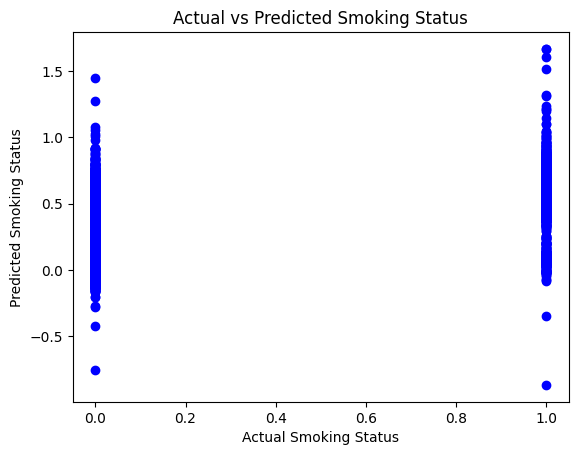

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


categorical_columns = ['cholesterol_category', 'gender', 'tartar']  # Add all columns that have categorical data

# Encoding the categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Defining features (X) and target (y)
X = df.drop(['smoking'], axis=1)  # Features are all columns except 'smoking'
y = df['smoking']  # Target variable is 'smoking'

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()


Trying for df(original dataset)-70%

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.16026587715170823
Root Mean Squared Error (RMSE): 0.4003322084865371
R-squared: 0.30660577786627297


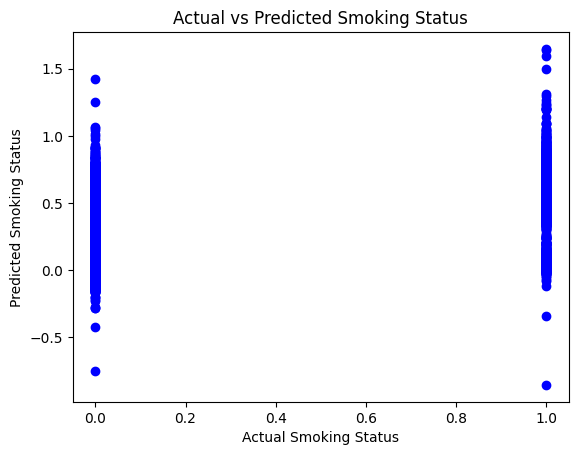

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


categorical_columns = ['cholesterol_category', 'gender', 'tartar']  # Add all columns that have categorical data


label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


X = df.drop(['smoking'], axis=1)  
y = df['smoking']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()


Trying for df(original dataset)-50%

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.16146766546421
Root Mean Squared Error (RMSE): 0.4018303939029625
R-squared: 0.3032616939975946


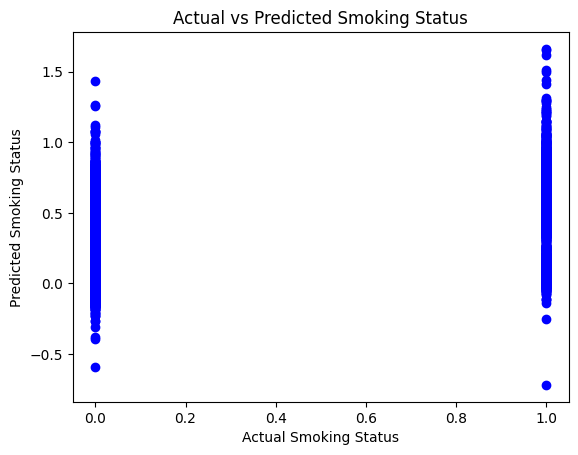

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


categorical_columns = ['cholesterol_category', 'gender', 'tartar']  


label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


X = df.drop(['smoking'], axis=1)  
y = df['smoking']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()


Trying with df_02

80%

In [80]:
df_0_2 

,gender,height(cm),weight(kg),waist(cm),triglyceride,hemoglobin,serum creatinine,Gtp,smoking
43025,1,175,75,83.0,111.0,16.1,0.9,55.0,1
43036,1,185,85,79.0,127.0,16.7,1.1,23.0,1
13688,1,170,70,80.0,43.0,15.8,1.2,20.0,1
40097,1,175,75,80.0,265.0,15.9,0.8,47.0,0
40092,1,165,50,68.0,165.0,15.7,0.9,27.0,1
...,...,...,...,...,...,...,...,...,...
2599,0,145,50,78.0,117.0,14.7,0.6,12.0,0
5246,1,165,70,90.0,108.0,12.7,0.8,43.0,0
16394,1,155,55,86.0,108.0,14.1,0.8,20.0,1
32038,1,165,60,83.0,87.0,12.5,1.3,39.0,0


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.1613261248675821
Root Mean Squared Error (RMSE): 0.4016542354657574
R-squared: 0.3024306346078751


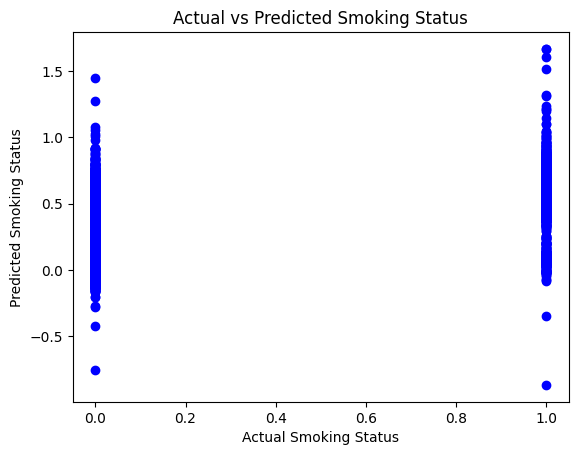

In [82]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data=df_0_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()

70%

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.16026587715170823
Root Mean Squared Error (RMSE): 0.4003322084865371
R-squared: 0.30660577786627297


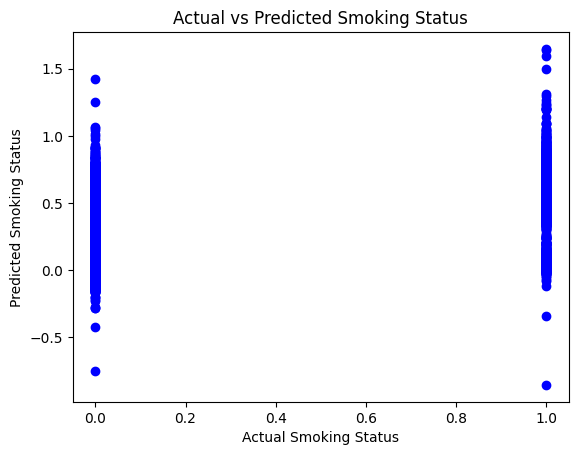

In [84]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data=df_0_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()

50%

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.16152129907247165
Root Mean Squared Error (RMSE): 0.4018971249865712
R-squared: 0.30292539774427185


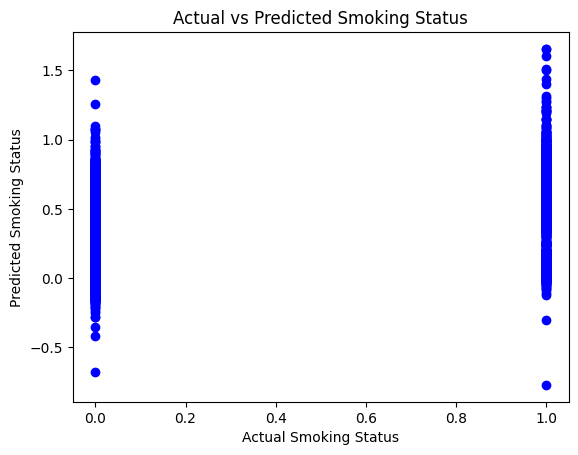

In [86]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data=df_0_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()

trying df_0_4

In [87]:
df_0_4

,gender,hemoglobin,smoking
43025,1,16.1,1
43036,1,16.7,1
13688,1,15.8,1
40097,1,15.9,0
40092,1,15.7,1
...,...,...,...
2599,0,14.7,0
5246,1,12.7,0
16394,1,14.1,1
32038,1,12.5,0


80% 

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.1613261248675821
Root Mean Squared Error (RMSE): 0.4016542354657574
R-squared: 0.3024306346078751


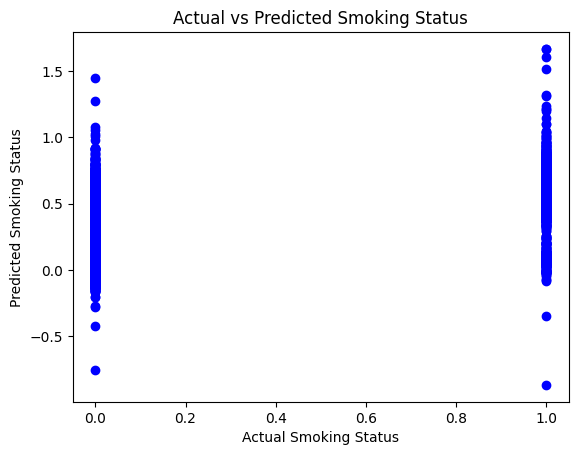

In [89]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data=df_0_4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculatib Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()

70%

Mean Squared Error (MSE): 0.16026587715170823
Root Mean Squared Error (RMSE): 0.4003322084865371
R-squared: 0.30660577786627297


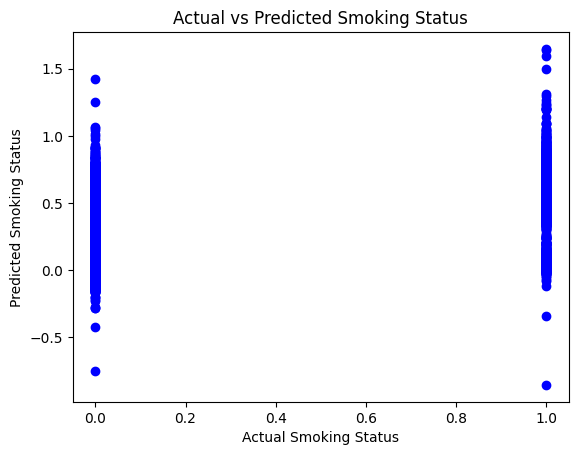

In [90]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data=df_0_4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()

60%

Mean Squared Error (MSE): 0.16152129907247165
Root Mean Squared Error (RMSE): 0.4018971249865712
R-squared: 0.30292539774427185


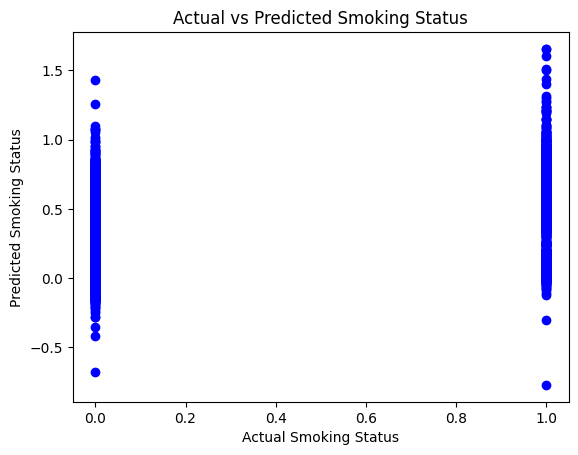

In [91]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

data=df_0_4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Smoking Status')
plt.ylabel('Predicted Smoking Status')
plt.title('Actual vs Predicted Smoking Status')
plt.show()

## Comparative Evaluation of Machine Learning Models for Smoking Prediction: Logistic Regression, SVM, Decision Trees, and K-Nearest Neighbors
We evaluate the models using accuracy, precision, recall, and F1-score on the test set. This helps in comparing their performance beyond accuracy, which can sometimes be misleading.


In [92]:


Y = df['smoking'] 
X = df.drop(['smoking'], axis=1)  # Feature columns

# Identifying the categorical columns that need to be encoded
categorical_columns = ['oral', 'tartar', 'gender']

# Initializing the LabelEncoder
le = LabelEncoder()

# Applying Label Encoding to the categorical columns
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Standardizing the numerical columns for better model performance
scaler = StandardScaler()

# Assuming the non-categorical columns are all the other columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Applying standardization to numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print shapes to verify split
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")


X_train shape: (44553, 27), X_test shape: (11139, 27)
Y_train shape: (44553,), Y_test shape: (11139,)


In [93]:



# Splitting the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Training the model
logistic_model.fit(X_train, Y_train)

# Predicting on the test set
Y_pred = logistic_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Displaying the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Displaying the classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.74
Confusion Matrix:
[[5481 1598]
 [1261 2799]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7079
           1       0.64      0.69      0.66      4060

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.75     11139



In [94]:
# Checking the distribution of classes in the target variable
print(Y.value_counts())


smoking
0    35237
1    20455
Name: count, dtype: int64


In [95]:




Y = df['smoking']  # Target column
X = df.drop(['smoking'], axis=1)  # Feature columns

categorical_columns = ['oral', 'tartar', 'gender']

# Initializing the LabelEncoder
le = LabelEncoder()

# Applying Label Encoding to the categorical columns
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Standardizing the numerical columns for better model performance
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("-" * 60)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, X_test, Y_train, Y_test)

# Support Vector Machine (SVM)
svm_model = SVC(probability=True)  # Enable probability estimates for RMSE calculation
evaluate_model(svm_model, X_train, X_test, Y_train, Y_test)

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, X_test, Y_train, Y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, Y_train, Y_test)


Model: LogisticRegression
Accuracy: 0.74
RMSE: 0.51
Confusion Matrix:
[[5481 1598]
 [1261 2799]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7079
           1       0.64      0.69      0.66      4060

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.75     11139

------------------------------------------------------------
Model: SVC
Accuracy: 0.76
RMSE: 0.49
Confusion Matrix:
[[5576 1503]
 [1147 2913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7079
           1       0.66      0.72      0.69      4060

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.75     11139
weighted avg       0.77      0.76      0.76     11139

------------------------------------------------------------

In [96]:
'''True Negatives (8281): The model correctly predicted non-smokers.
False Positives (559): The model incorrectly predicted smokers for non-smokers.
False Negatives (1291): The model incorrectly predicted non-smokers for smokers.
True Positives (1008): The model correctly predicted smokers.
Classification Report for Logistic Regression
Precision:
->Class 0 (non-smoker): 0.87  Out of all predicted non-smokers, 87% were correct.
->Class 1 (smoker): 0.64 Out of all predicted smokers, 64% were correct.
Recall:
->Class 0: 0.94 The model identified 94% of all non-smokers correctly.
->Class 1: 0.44 The model identified only 44% of all smokers correctly, which suggests the model struggles more with identifying smokers.
F1-Score:
->Class 0: 0.90  The harmonic mean of precision and recall for non-smokers is high.
->Class 1: 0.52 The F1-score for smokers is moderate, indicating the model could be improved for this class.'''

'True Negatives (8281): The model correctly predicted non-smokers.\nFalse Positives (559): The model incorrectly predicted smokers for non-smokers.\nFalse Negatives (1291): The model incorrectly predicted non-smokers for smokers.\nTrue Positives (1008): The model correctly predicted smokers.\nClassification Report for Logistic Regression\nPrecision:\n->Class 0 (non-smoker): 0.87  Out of all predicted non-smokers, 87% were correct.\n->Class 1 (smoker): 0.64 Out of all predicted smokers, 64% were correct.\nRecall:\n->Class 0: 0.94 The model identified 94% of all non-smokers correctly.\n->Class 1: 0.44 The model identified only 44% of all smokers correctly, which suggests the model struggles more with identifying smokers.\nF1-Score:\n->Class 0: 0.90  The harmonic mean of precision and recall for non-smokers is high.\n->Class 1: 0.52 The F1-score for smokers is moderate, indicating the model could be improved for this class.'

In [97]:
'''
->Best Accuracy: Decision Tree Classifier (0.77).
->Best RMSE (Lowest Error): Decision Tree Classifier (0.48).
->Best Recall for Smokers (Class 1): SVC (0.72).
->Overall Best Model: Decision Tree Classifier as it has the highest accuracy, lowest RMSE, and balanced performance across both classes.
->SVC is a close second, performing better in terms of recall for smokers (class 1) but slightly lower overall accuracy than decision trees.
->Logistic Regression and KNN show comparable performance, with accuracy around 0.74 and similar precision/recall trade-offs. Both models struggle to accurately predict smokers (class 1).'''

'\n->Best Accuracy: Decision Tree Classifier (0.77).\n->Best RMSE (Lowest Error): Decision Tree Classifier (0.48).\n->Best Recall for Smokers (Class 1): SVC (0.72).\n->Overall Best Model: Decision Tree Classifier as it has the highest accuracy, lowest RMSE, and balanced performance across both classes.\n->SVC is a close second, performing better in terms of recall for smokers (class 1) but slightly lower overall accuracy than decision trees.\n->Logistic Regression and KNN show comparable performance, with accuracy around 0.74 and similar precision/recall trade-offs. Both models struggle to accurately predict smokers (class 1).'

In [98]:
df_0_4

,gender,hemoglobin,smoking
43025,1,16.1,1
43036,1,16.7,1
13688,1,15.8,1
40097,1,15.9,0
40092,1,15.7,1
...,...,...,...
2599,0,14.7,0
5246,1,12.7,0
16394,1,14.1,1
32038,1,12.5,0


Applying it to df_0_2,df_0_4

In [99]:

def apply_models(filtered_df):
    Y = filtered_df['smoking']  # Target column
    X = filtered_df.drop(['smoking'], axis=1)  # Feature columns

    # Standardize the numerical columns for better performance
    scaler = StandardScaler()
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Function to train and evaluate models
    def evaluate_model(model, X_train, X_test, Y_train, Y_test):
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # Calculating accuracy and RMSE
        accuracy = accuracy_score(Y_test, Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

        conf_matrix = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        print(f"Model: {model.__class__.__name__}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)
        print("-" * 60)

    # Applying models
    logistic_model = LogisticRegression(max_iter=10000)
    evaluate_model(logistic_model, X_train, X_test, Y_train, Y_test)

    svm_model = SVC(probability=True)
    evaluate_model(svm_model, X_train, X_test, Y_train, Y_test)

    decision_tree_model = DecisionTreeClassifier()
    evaluate_model(decision_tree_model, X_train, X_test, Y_train, Y_test)

    knn_model = KNeighborsClassifier()
    evaluate_model(knn_model, X_train, X_test, Y_train, Y_test)

# Applying the models on df_0_2
print("Results for df_0_2:")
apply_models(df_0_2)

# Applying the models on df_0_4
print("Results for df_0_4:")
apply_models(df_0_4)


Results for df_0_2:
Model: LogisticRegression
Accuracy: 0.74
RMSE: 0.51
Confusion Matrix:
[[5406 1673]
 [1247 2813]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      7079
           1       0.63      0.69      0.66      4060

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139

------------------------------------------------------------
Model: SVC
Accuracy: 0.74
RMSE: 0.51
Confusion Matrix:
[[5325 1754]
 [1134 2926]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79      7079
           1       0.63      0.72      0.67      4060

    accuracy                           0.74     11139
   macro avg       0.72      0.74      0.73     11139
weighted avg       0.75      0.74      0.74     11139

----------------------------------------